In [1]:
import xarray as xr  # "canonical" namespace short-hand
import pathlib
import datetime
import math


In [2]:
%%time
ds = xr.open_dataset(
    "/Users/afox/Jedi/wrf_hydro_internal/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc", engine="netcdf4"
)
ds

CPU times: user 40.2 ms, sys: 5.01 ms, total: 45.2 ms
Wall time: 44.4 ms


<xarray.Dataset>
Dimensions:  (south_north: 24, west_east: 30, soil_layers_stag: 4, feature_id: 189)
Dimensions without coordinates: south_north, west_east, soil_layers_stag, feature_id
Data variables:
    HGT      (south_north, west_east) float32 ...
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    ZS       (soil_layers_stag) float32 ...
    Length   (feature_id) float32 ...
    lat      (feature_id) float32 ...
    lon      (feature_id) float32 ...
Attributes: (12/21)
    domain_dir:             /home/vagrant/jedi/domains/private/taylor_park_v2_1
    config:                 nwm_long_range_snow
    hrldas_patch_filename:  hrldas_namelist_patches.json
    hydro_patch_filename:   hydro_namelist_patches.json
    lsm_dx:                 1000.0
    lsm_dy:                 1000.0
    ...                     ...
    stream_dx_name:         Length
    stream_xdim_name:       feature_id
    stream_lat_name:        lat
    stream_lon_name:        lon
    stream_src_file:        /home/vagrant/jedi/domains/private/taylor_park_v2...
    stream_src_md5:         b43e1fa8443092671bf1338556152f04

In [3]:
height = ds.HGT
latitude = ds.XLAT
longitude = ds.XLONG

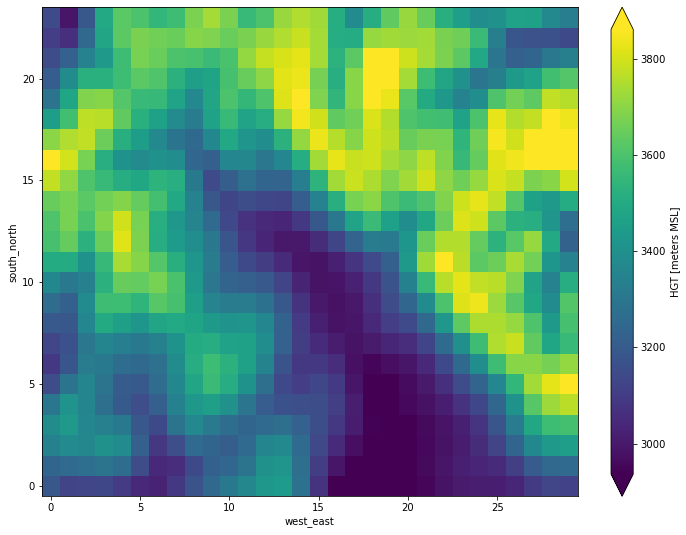

In [4]:
ds.HGT.plot(robust=True, figsize=(12, 9));

In [5]:
%%time
bkg = xr.open_dataset(
#    "./input/wrf_hydro_nwm_files/ensemble/RESTART.2017010100_DOMAIN1_mem000", engine="netcdf4"
    "./input/wrf_hydro_nwm_files/RESTART.2017010100_DOMAIN1", engine="netcdf4"
)
bkg

CPU times: user 26.2 ms, sys: 8.61 ms, total: 34.8 ms
Wall time: 34.4 ms


<xarray.Dataset>
Dimensions:      (Time: 1, south_north: 24, soil_layers_stag: 4, west_east: 30, snow_layers: 3, sosn_layers: 7)
Dimensions without coordinates: Time, south_north, soil_layers_stag, west_east, snow_layers, sosn_layers
Data variables: (12/63)
    Times        (Time) |S19 ...
    SOIL_T       (Time, south_north, soil_layers_stag, west_east) float32 ...
    SNOW_T       (Time, south_north, snow_layers, west_east) float32 ...
    SMC          (Time, south_north, soil_layers_stag, west_east) float32 ...
    SH2O         (Time, south_north, soil_layers_stag, west_east) float32 ...
    ZSNSO        (Time, south_north, sosn_layers, west_east) float32 ...
    ...           ...
    QSPRINGXY    (Time, south_north, west_east) float32 ...
    FDEPTHXY     (Time, south_north, west_east) float32 ...
    RIVERCONDXY  (Time, south_north, west_east) float32 ...
    RIVERBEDXY   (Time, south_north, west_east) float32 ...
    EQZWT        (Time, south_north, west_east) float32 ...
    PEXPXY       (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:          RESTART FILE FROM HRLDAS v20150506
    missing_value:  -1e+33
    START_DATE:     2007-10-01_00:00:00
    MAP_PROJ:       1
    LAT1:           38.83563
    LON1:           -106.78017
    DX:             1000.0
    DY:             1000.0
    TRUELAT1:       30.0
    TRUELAT2:       60.0
    STAND_LON:      -97.0
    MMINLU:         USGS

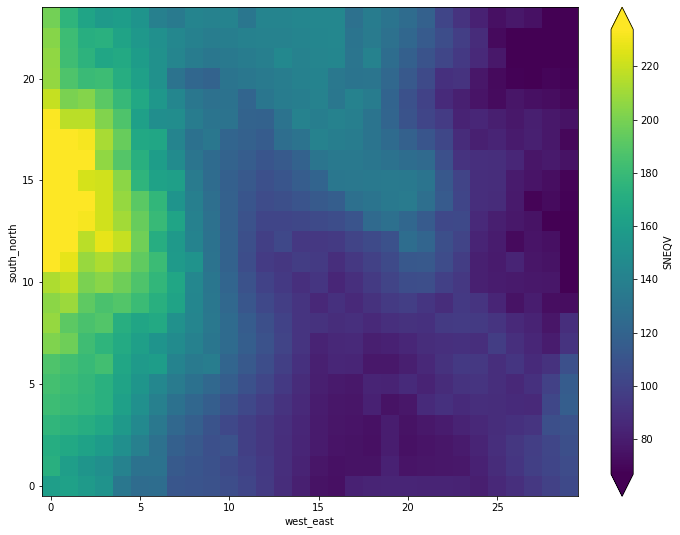

In [6]:
bkg.SNEQV.plot(robust=True, figsize=(12, 9));

CPU times: user 62.9 ms, sys: 10.1 ms, total: 73 ms
Wall time: 73.6 ms


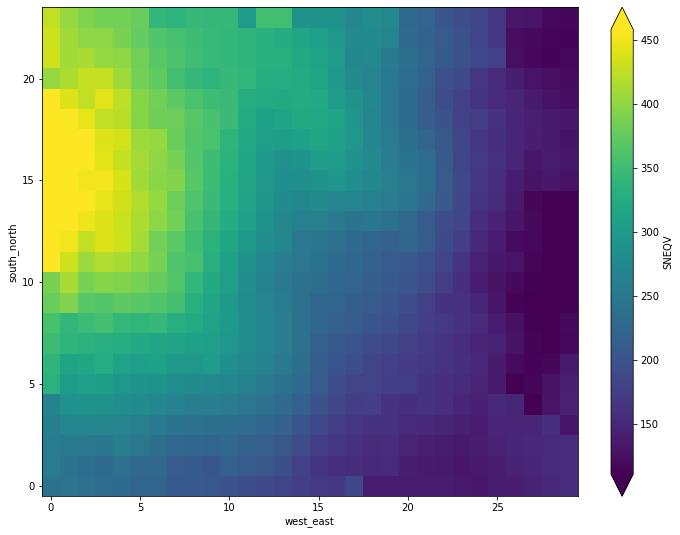

In [8]:
%%time
ana = xr.open_dataset(
#    "./output/letkf/single_obs/letkf.lsm.ens.0.2017-01-01T00:00:00Z.PT0S", engine="netcdf4"
    "./output/3dvar/3dvar.lsm.an.2017-01-01T00:00:00Z", engine="netcdf4"    
)

ana.SNEQV.plot(robust=True, figsize=(12, 9));

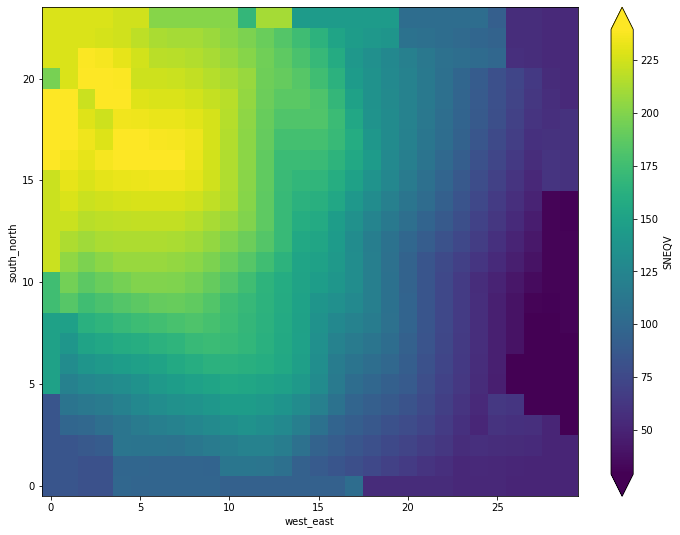

In [9]:
increment = ana.SNEQV - bkg.SNEQV
increment.plot(robust=True, figsize=(12, 9));